In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing

### open file

In [2]:
musics_df0 = pd.read_csv("musics.csv")
musics_df0.head()

,artist,song,duration_ms,explicit,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,77
1,blink-182,All The Small Things,167066,False,1999,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",79
2,Faith Hill,Breathe,250546,False,1999,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",66
3,Bon Jovi,It's My Life,224493,False,2000,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",78
4,*NSYNC,Bye Bye Bye,200560,False,2000,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,65


### clear data

In [3]:
musics_df = musics_df0
print (musics_df.info())
musics_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   danceability      2000 non-null   float64
 6   energy            2000 non-null   float64
 7   key               2000 non-null   int64  
 8   loudness          2000 non-null   float64
 9   mode              2000 non-null   int64  
 10  speechiness       2000 non-null   float64
 11  acousticness      2000 non-null   float64
 12  instrumentalness  2000 non-null   float64
 13  liveness          2000 non-null   float64
 14  valence           2000 non-null   float64
 15  tempo             2000 non-null   float64
 16  genre             2000 non-null   object 


,duration_ms,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558,59.872500
std,39136.569008,5.85996,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112,21.335577
min,113000.000000,1998.00000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000,0.000000
25%,203580.000000,2004.00000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750,56.000000
50%,223279.500000,2010.00000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500,65.500000
75%,248133.000000,2015.00000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500,73.000000
max,484146.000000,2020.00000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000,89.000000


### Delete  song,year, artist columns & shifting popularity to 1-5

In [4]:
musics_df['popularity'] = musics_df['popularity'].replace(0, 1)
musics_df['category'] = pd.cut(musics_df['popularity'], bins=[0, 20, 40, 60, 80, 100], labels=['1', '2', '3', '4', '5'])
print(musics_df['category'])
musics_df = musics_df.drop(['song','year','artist','popularity'], axis=1)
musics_df = musics_df.rename(columns={'category': 'popularity'})
musics_df.head(15)

0       4
1       4
2       4
3       4
4       4
       ..
1995    4
1996    4
1997    4
1998    4
1999    5
Name: category, Length: 2000, dtype: category
Categories (5, object): ['1' < '2' < '3' < '4' < '5']


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity
0,211160,False,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop,4
1,167066,False,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop",4
2,250546,False,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country",4
3,224493,False,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal",4
4,200560,False,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop,4
5,253733,True,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B",4
6,284200,True,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop,5
7,258560,False,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock",4
8,271333,False,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B",4
9,307153,False,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic,4


### explicit column quantification

In [5]:
musics_df['explicit'] = musics_df['explicit'].astype(bool)
musics_df['explicit'] = musics_df['explicit'].replace({True: 1, False: 0})
musics_df.head(20)

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop,4
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.6120,0.684,148.726,"rock, pop",4
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.17300,0.000000,0.2510,0.278,136.859,"pop, country",4
3,224493,0,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.3470,0.544,119.992,"rock, metal",4
4,200560,0,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop,4
5,253733,1,0.706,0.888,2,-6.959,1,0.0654,0.11900,0.000096,0.0700,0.714,121.549,"hip hop, pop, R&B",4
6,284200,1,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop,5
7,258560,0,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.4670,0.861,103.035,"pop, rock",4
8,271333,0,0.713,0.678,5,-3.525,0,0.1020,0.27300,0.000000,0.1490,0.734,138.009,"pop, R&B",4
9,307153,0,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic,4


### genre column quantification (one hot encoding)

In [27]:
all_genre = set()
for s in musics_df['genre']:
    all_genre.update(s.split(", "))

num_genre = len(all_genre)

genre_ids = {s:i for i,s in enumerate(all_genre)}

new_genre1 = []
for s in musics_df['genre']:
    row_arr = [0] * num_genre
    for sp in s.split(", "):
        if sp in all_genre:
            row_arr[genre_ids[sp]] = 1
    new_genre1.append(row_arr)

new_genre1 = np.array(new_genre1)

print(new_genre1)
print(genre_ids)
new_genre1 = pd.DataFrame(new_genre1)

new_genre1

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'pop': 0, 'Folk/Acoustic': 1, 'rock': 2, 'jazz': 3, 'hip hop': 4, 'classical': 5, 'Dance/Electronic': 6, 'World/Traditional': 7, 'metal': 8, 'latin': 9, 'country': 10, 'blues': 11, 'set()': 12, 'R&B': 13, 'easy listening': 14}


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1998,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Convert columns to a vector

In [7]:
def combine_rows(row):
    return row.values.tolist()

new_col = new_genre1.apply(combine_rows, axis=1)
new_genre_col = new_col
print(new_genre1.head())
new_genre = pd.DataFrame(new_genre_col)
musics_df = musics_df.assign(new_genre=new_genre)
musics_df

   0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0
2   1   0   0   0   0   0   0   0   0   0   1   0   0   0   0
3   0   0   1   0   0   0   0   0   1   0   0   0   0   0   0
4   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0


,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,popularity,new_genre
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",4,"[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
3,224493,0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",4,"[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
4,200560,0,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,0,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1996,178426,0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1997,200593,0,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country",4,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
1998,171029,0,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [8]:
musics_df2 = musics_df
musics_df2 = musics_df2.drop(['new_genre','popularity','genre',], axis=1)
musics_df2

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,0,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,0,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,0,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,0,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


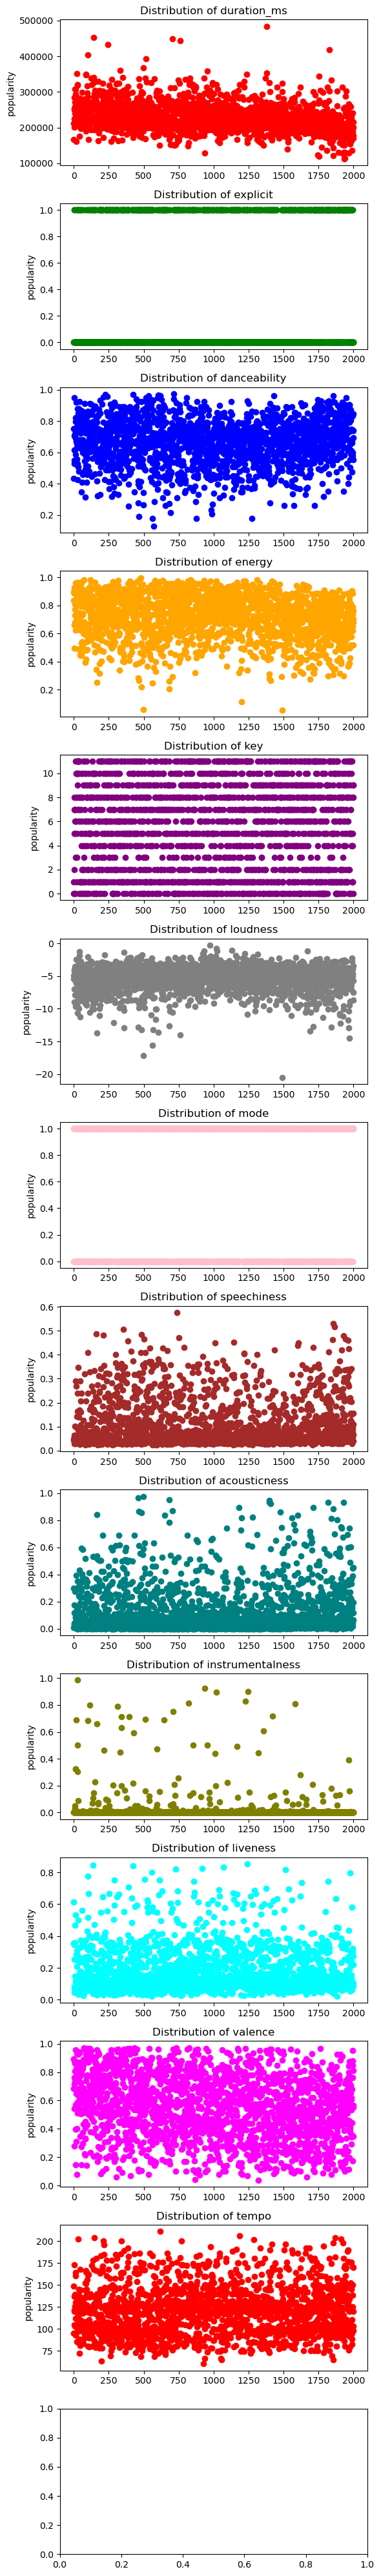

In [9]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'gray', 'pink', 'brown', 'teal', 'olive', 'cyan', 'magenta']
fig, axs = plt.subplots(nrows=14, figsize=(6, 40))
for i, col in enumerate(musics_df2.columns):
    axs[i].scatter(musics_df.index, musics_df2[col], color=colors[i%len(colors)])
    axs[i].set_title(f"Distribution of {col}")
    axs[i].set_ylabel("popularity")
plt.tight_layout()
plt.show()

###  normalizing & calculating correlation factor

In [10]:
from sklearn.preprocessing import StandardScaler
musics_df0 = musics_df0.drop(['song','year','artist','genre', 'category'], axis=1)

X = musics_df0.iloc[:, :-1]
y = musics_df0.iloc[:, -1]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

corr_matrix = musics_df0.corr(numeric_only=True)
corr_matrix

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
duration_ms,1.000000,0.123595,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603,0.050186
explicit,0.123595,1.000000,0.248845,-0.162462,0.003320,-0.089829,0.049576,0.417343,-0.033523,-0.082522,0.008884,-0.045455,0.013221,0.046902
danceability,-0.060057,0.248845,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418,-0.003538
energy,-0.078763,-0.162462,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719,-0.013894
key,-0.002560,0.003320,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431,0.014641
loudness,-0.079912,-0.089829,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709,0.030809
mode,-0.003848,0.049576,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434,-0.021329
speechiness,0.066998,0.417343,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747,0.021040
acousticness,0.010923,-0.033523,-0.065429,-0.445469,0.002365,-0.310039,0.005744,0.000394,1.000000,-0.005214,-0.110043,-0.128128,-0.103660,0.024641
instrumentalness,-0.004208,-0.082522,0.023207,0.037861,-0.008173,-0.104925,-0.038613,-0.062954,-0.005214,1.000000,-0.034897,-0.015192,0.034608,-0.048381


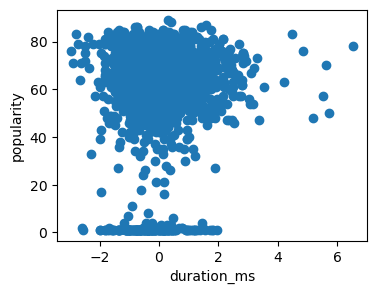

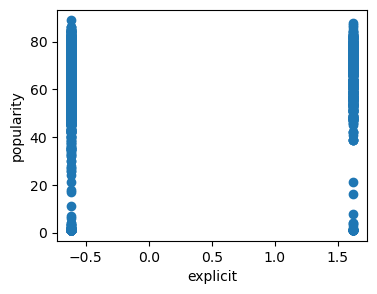

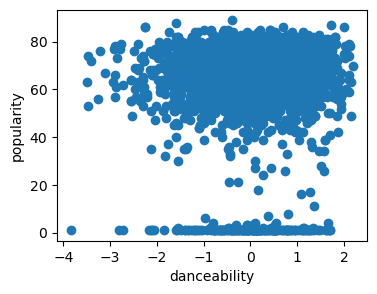

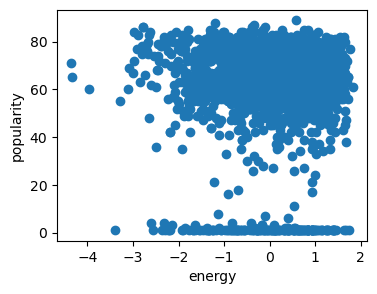

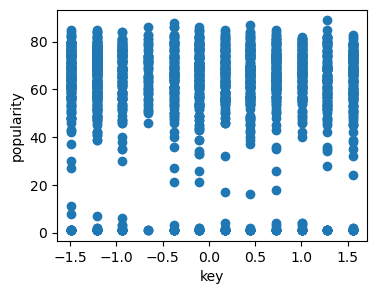

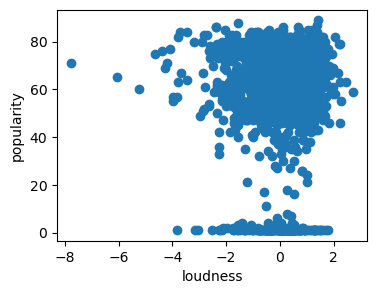

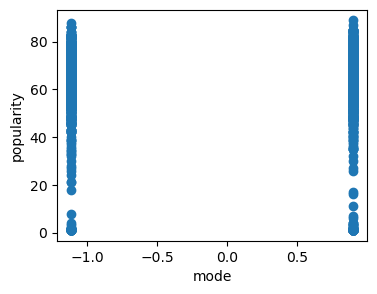

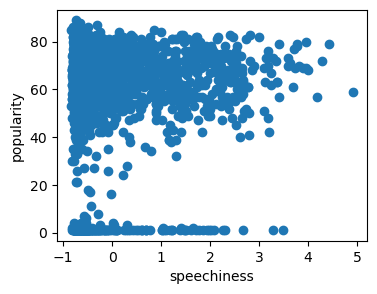

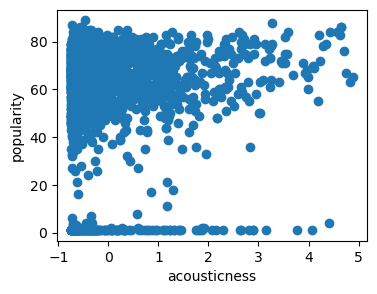

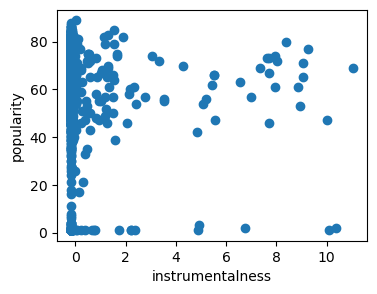

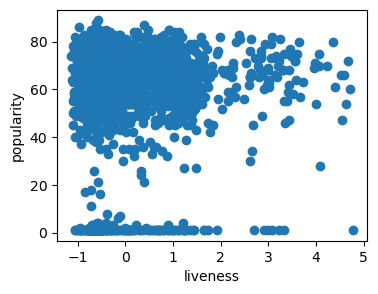

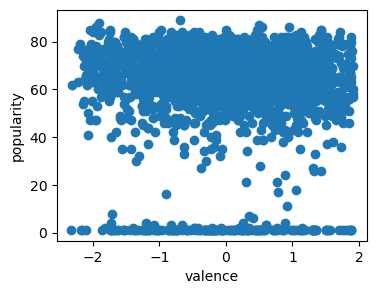

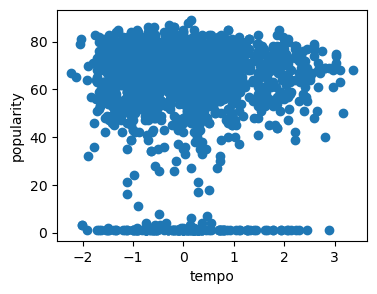

In [11]:
for i, col in enumerate(X.columns):
    fig = plt.figure(figsize=(4, 3))
    plt.scatter(X_normalized[:, i], y)
    plt.xlabel(col)
    plt.ylabel('popularity')
    plt.show()

### define X , y 

In [12]:
musics_df3 = musics_df
musics_df3 = musics_df3.drop(['new_genre','genre',], axis=1)
feature_df = musics_df3[['duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']]
X = np.asarray(feature_df)
Scaler= preprocessing.StandardScaler().fit(X)
X =Scaler.transform(X.astype(float))
print('X : \n',X[0:10])
print('y : \n',y[0:10])

X : 
 [[-0.44951624 -0.61665408  0.59525376  0.74413046 -1.21134817  0.03540329
  -1.11339196 -0.62274794  0.98697358 -0.17331627  1.23571936  1.55025566
  -0.92986699]
 [-1.57646805 -0.61665408 -1.66288167  1.15668497 -1.48803803  0.30751937
   0.8981563  -0.56969739 -0.68466912 -0.17351798  3.06315751  0.59920732
   1.06094401]
 [ 0.5571088  -0.61665408 -0.98615338 -1.46925722  0.44879094 -1.8078469
   0.8981563  -0.77565836  0.25415127 -0.17351798  0.49621132 -1.23948612
   0.62077942]
 [-0.10875222 -0.61665408 -0.82943736  1.26146072 -1.48803803  0.74983733
  -1.11339196 -0.59258194 -0.59234505 -0.17336413  1.17883413 -0.0348249
  -0.00484257]
 [-0.7204304  -0.61665408 -0.38065966  1.35968798  0.72548079  0.36546043
  -1.11339196 -0.5405716  -0.50867636 -0.16166597 -0.68771262  1.48232363
   1.94854313]
 [ 0.63856196  1.62165473  0.27469826  1.09774861 -0.93465832 -0.74835311
   0.8981563  -0.39702305 -0.05744247 -0.17241939 -0.7908171   0.73507137
   0.05290886]
 [ 1.41723572  1.6

### seprating X,y  to train,test,validation data

In [36]:
from sklearn.model_selection import train_test_split
musics_df3['popularity'] = musics_df3['popularity'].astype('float')
y = np.asarray(musics_df3['popularity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1111)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print ('val set:', X_val.shape,  y_val.shape)

Train set: (1600, 13) (1600,)
Test set: (200, 13) (200,)
val set: (200, 13) (200,)


### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/len(y_test)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)

Confusion Matrix:
 [[ 2  0  3  4  2]
 [ 0  0  1  3  0]
 [ 3  3 13 32  3]
 [ 9  3 25 79  4]
 [ 2  0  2  5  2]]
Accuracy: 0.48


### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/len(y_test)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)

Confusion Matrix:
 [[  0   0   0  11   0]
 [  0   0   0   4   0]
 [  0   0   4  50   0]
 [  0   0   7 113   0]
 [  0   0   0  10   1]]
Accuracy: 0.59


### KNN Classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/len(y_test)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)

Confusion Matrix:
 [[ 0  0  3  8  0]
 [ 0  0  0  4  0]
 [ 4  0 13 37  0]
 [ 8  1 21 90  0]
 [ 0  0  2  9  0]]
Accuracy: 0.515


### SVM model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

model = SVC(kernel='linear', C=1.0, gamma='auto')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy = (cm[0,0]+cm[1,1]+cm[2,2]+cm[3,3]+cm[4,4])/len(y_test)

print('Confusion Matrix:\n', cm)
print('Accuracy:', accuracy)

Confusion Matrix:
 [[  0   0   0  11   0]
 [  0   0   0   4   0]
 [  0   0   0  54   0]
 [  0   0   0 120   0]
 [  0   0   0  11   0]]
Accuracy: 0.6


### False prediction

In [18]:
false_predictions = X_test[y_test != y_pred]
false_predictions = pd.DataFrame(false_predictions)
false_predictions


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.733388,-0.616654,-0.181203,0.855455,0.172101,0.969703,0.898156,-0.628989,-0.601000,-0.007134,-0.691268,1.020386,0.291741
1,-0.292437,-0.616654,-0.288055,-0.113721,-1.488038,0.325109,0.898156,1.377570,2.504550,-0.173518,-0.604518,0.399940,-1.417842
2,2.148704,1.621655,1.186501,0.063088,0.725481,0.930386,0.898156,1.231941,-0.714501,-0.173518,-0.406842,-0.478647,1.293953
3,-0.391116,-0.616654,0.224834,-0.211948,-0.934658,-0.566253,-1.113392,-0.534330,0.779244,-0.173471,-0.674913,0.861878,1.291542
4,1.702105,1.621655,1.044031,0.862003,-0.934658,-0.343283,0.898156,3.093911,-0.191312,-0.173503,-1.083776,0.748658,2.394605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.223072,-0.616654,-0.010240,1.320397,-0.934658,0.545492,-1.113392,-0.631070,-0.524256,-0.171341,-0.838458,1.251355,-0.078210
76,-1.898984,-0.616654,0.488402,0.586967,-0.104589,-0.435368,0.898156,-0.134891,-0.299793,-0.173518,-0.916676,-0.745847,0.181320
77,-0.427358,1.621655,0.552513,-0.834054,0.725481,-0.433299,0.898156,-0.530170,-0.713982,-0.173458,-0.413952,-1.728597,-0.338295
78,0.985818,-0.616654,0.360180,0.429803,-1.488038,-0.128073,0.898156,-0.781900,-0.678322,-0.173233,-0.758819,-0.392600,-0.749491


### calculating  itteration of each genre

In [22]:
column_sums = new_genre1.sum()
print(column_sums)

0     1633
1       20
2      234
3        2
4      778
5        1
6      390
7       10
8       66
9       64
10      21
11       4
12      22
13     452
14       7
dtype: int64


In [23]:
import pandas as pd

genre_counts = musics_df['new_genre'].value_counts()

most_common_genre = genre_counts.index[0]
least_common_genre = genre_counts.index[-1]

print("Most common genre:", most_common_genre)
print("Least common genre:", least_common_genre)

Most common genre: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Least common genre: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


### calculate probablity according to naive bayesian

In [29]:
count_h_p = ((new_genre1.iloc[:, 0] == 1) & (new_genre1.iloc[:, 4] == 1)).sum()
count_R = (new_genre1.iloc[:, 13] == 1).sum()
count_R_h_p = ((new_genre1.iloc[:, 13] == 1) & (new_genre1.iloc[:, 0] == 1) & (new_genre1.iloc[:, 4] == 1)).sum()


P_h_p_given_R = count_R_h_p / count_R
P_R= count_R / len(new_genre1)
P_h_p = count_h_p / len(new_genre1)

P_h_p_given_R = P_h_p_given_R * P_R / P_h_p

print('probablity that if it was in the pop and hip-hop category, it would also be in R&B:',P_h_p_given_R)


probablity that if it was in the pop and hip-hop category, it would also be in R&B: 0.39619651347068147


### define output and attach labels

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
musics_df5 = musics_df
musics_df5.genre = le.fit_transform(musics_df5.genre)
musics_df5 = musics_df5.drop(['new_genre','popularity'], axis=1)
musics_df5

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,211160,0,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,30
1,167066,0,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,54
2,250546,0,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,36
3,224493,0,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,53
4,200560,0,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,0,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,30
1996,178426,0,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,30
1997,200593,0,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,17
1998,171029,0,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,30


### define new y and seprating datas

In [35]:
musics_df5['genre'] = musics_df5['genre'].astype('float')
y2 = np.asarray(musics_df5['genre'])
y2 [0:20]

array([30., 54., 36., 53., 30., 21., 14., 40., 33.,  0., 30., 30., 30.,
       54., 31., 21., 30., 30., 30., 14.])

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.1)
X_train, X_val, y2_train, y2_val = train_test_split(X_train, y2_train, test_size=0.1111)
print ('Train set:', X_train.shape,  y2_train.shape)
print ('Test set:', X_test.shape,  y2_test.shape)
print ('val set:', X_val.shape,  y2_val.shape)

Train set: (1600, 13) (1600,)
Test set: (200, 13) (200,)
val set: (200, 13) (200,)


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier(max_depth=100, min_samples_split=50)
model.fit(X_train, y2_train)

y2_pred = model.predict(X_test)
cm = confusion_matrix(y2_test, y2_pred)
accuracy = np.trace(cm) / np.sum(cm)

print('Confusion Matrix:\n', cm)
print("accuracy", accuracy)

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy 0.315
